In [252]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt
import matplotlib.pyplot as plt

In [253]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [254]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [255]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6).all()


[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [256]:
#  3. Convert the June temperatures to a list.
june_temps = []
june_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6).all()

In [257]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temps, columns=['date', 'tempurature'])
june_df.set_index(june_df['date'], inplace=True)
june_df = june_df.sort_index()
june_df

,date,tempurature
date,,
2010-06-01,2010-06-01,78.0
2010-06-01,2010-06-01,73.0
2010-06-01,2010-06-01,77.0
2010-06-01,2010-06-01,69.0
2010-06-01,2010-06-01,76.0
...,...,...
2017-06-30,2017-06-30,76.0
2017-06-30,2017-06-30,75.0
2017-06-30,2017-06-30,75.0


In [258]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_summary = june_df.describe()
june_summary

,tempurature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [259]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12).all()

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [260]:
# 7. Convert the December temperatures to a list.
dec_temps = []
dec_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12).all()

In [261]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_temps, columns=['date', 'tempurature'])
dec_df.set_index(dec_df['date'], inplace=True)
dec_df = dec_df.sort_index()
dec_df

,date,tempurature
date,,
2010-12-01,2010-12-01,76.0
2010-12-01,2010-12-01,73.0
2010-12-01,2010-12-01,72.0
2010-12-01,2010-12-01,78.0
2010-12-01,2010-12-01,72.0
...,...,...
2016-12-31,2016-12-31,67.0
2016-12-31,2016-12-31,72.0
2016-12-31,2016-12-31,66.0


In [262]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_summary = dec_df.describe()
dec_summary

,tempurature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# Extra Quieries

In [263]:
june_perc = []
june_perc =  session.query(Measurement.date, Measurement.prcp).\
    filter(extract('month', Measurement.date)==6)

dec_perc = []
dec_perc =  session.query(Measurement.date, Measurement.prcp).\
    filter(extract('month', Measurement.date)==12)

In [264]:
june_perc_df = pd.DataFrame(june_perc, columns=['date', 'precipitation'])
june_perc_df = june_perc_df.sort_index()
june_perc_df = june_perc_df.reset_index()

dec_perc_df = pd.DataFrame(dec_perc, columns=['date', 'precipitation'])
dec_perc_df = dec_perc_df.sort_index()
dec_perc_df = dec_perc_df.reset_index()

In [265]:
june_perc_df = june_perc_df.groupby(["date"]).mean()['precipitation']

dec_perc_df = dec_perc_df.groupby(["date"]).mean()['precipitation']


In [266]:
june_perc_df

date
2010-06-01    0.018750
2010-06-02    0.007778
2010-06-03    0.026667
2010-06-04    0.001111
2010-06-05    0.011250
                ...   
2017-06-26    0.020000
2017-06-27    0.018333
2017-06-28    0.005000
2017-06-29    0.011667
2017-06-30    0.074286
Name: precipitation, Length: 240, dtype: float64

In [267]:
dec_perc_df

date
2010-12-01    0.565000
2010-12-02    0.115714
2010-12-03    0.405000
2010-12-04    0.027143
2010-12-05    0.000000
                ...   
2016-12-27    0.040000
2016-12-28    0.068333
2016-12-29    0.396667
2016-12-30    0.558333
2016-12-31    0.428000
Name: precipitation, Length: 217, dtype: float64

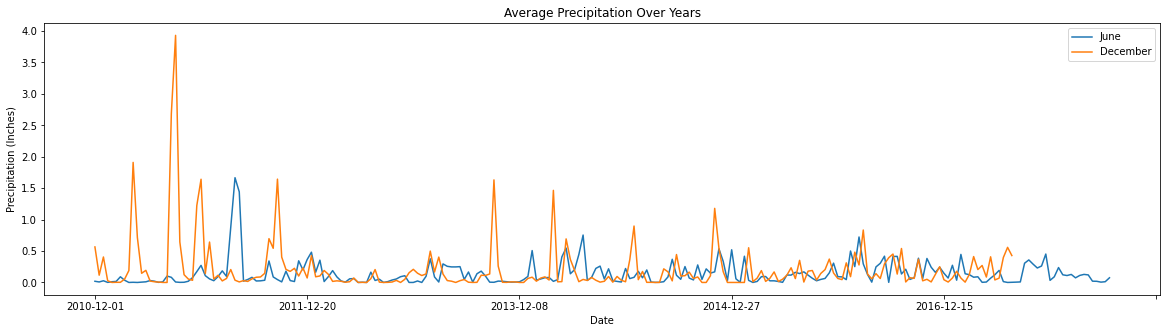

In [268]:
Months = ["June", "December"]
june_perc_df.plot(figsize=(20, 5))
dec_perc_df.plot(figsize=(20, 5))
plt.legend(Months)
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.title('Average Precipitation Over Years')
plt.savefig("images/precipitation_june_vs_dec.png")

In [269]:
june_temp = []
june_temp =  session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6)

dec_temp = []
dec_temp =  session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12)

In [270]:
june_temp_df = pd.DataFrame(june_temp, columns=['date', 'temperature'])
june_temp_df = june_temp_df.sort_index()
june_temp_df = june_temp_df.reset_index()

dec_temp_df = pd.DataFrame(dec_temp, columns=['date', 'temperature'])
dec_temp_df = dec_temp_df.sort_index()
dec_temp_dff = dec_temp_df.reset_index()

In [271]:
june_temp_df = june_temp_df.groupby(["date"]).mean()['temperature']

dec_temp_df = dec_temp_df.groupby(["date"]).mean()['temperature']


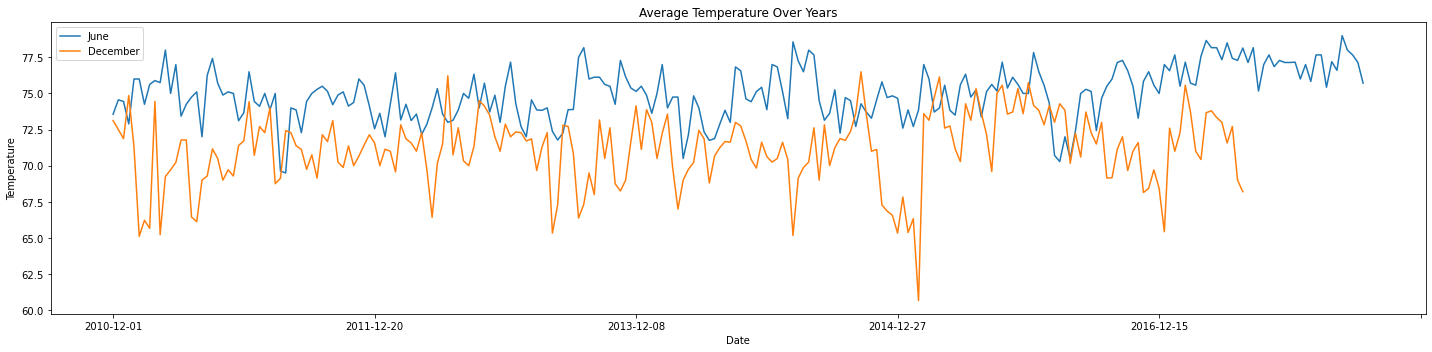

In [272]:
june_temp_df.plot(figsize=(20, 5))
dec_temp_df.plot()
plt.legend(Months)
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title('Average Temperature Over Years')

plt.tight_layout()
plt.savefig("images/ave_temp_june_vs_dec.png")

# Unneeded Material

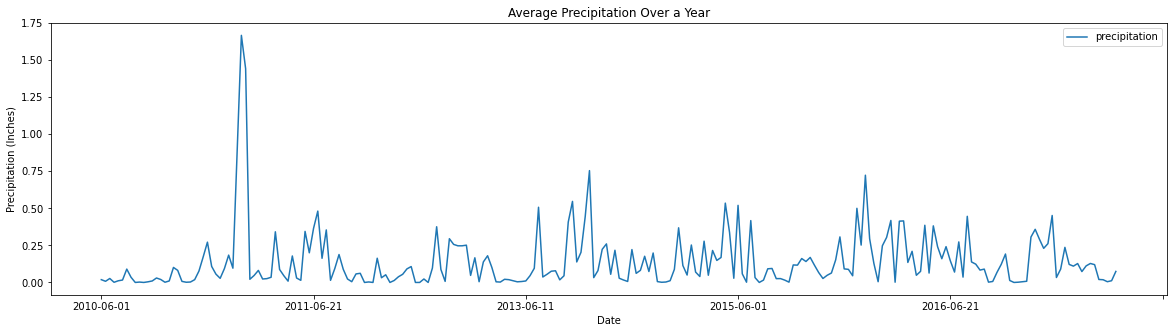

In [273]:
june_perc_df.plot(figsize=(20, 5))
plt.legend()
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.title('Average Precipitation Over a Year')
plt.savefig("images/ave_prec_year")

In [275]:
Jan_Feb_temps = []
Jan_Feb_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)<=2).all()

In [276]:
Jan_Feb_df = pd.DataFrame(Jan_Feb_temps, columns=['date', 'tempurature'])
Jan_Feb_df.set_index(Jan_Feb_df['date'], inplace=True)
Jan_Feb_df = Jan_Feb_df.sort_index()
Jan_Feb_df

,date,tempurature
date,,
2010-01-01,2010-01-01,65.0
2010-01-01,2010-01-01,72.0
2010-01-01,2010-01-01,75.0
2010-01-01,2010-01-01,70.0
2010-01-01,2010-01-01,66.0
...,...,...
2017-02-28,2017-02-28,73.0
2017-02-28,2017-02-28,73.0
2017-02-28,2017-02-28,72.0


In [277]:
Jan_Feb_df.describe()


,tempurature
count,3337.000000
mean,69.071621
std,4.200530
min,54.000000
25%,66.000000
50%,69.000000
75%,72.000000
max,83.000000


In [278]:
# Filtering the Data further so it only takes into account a year
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
temps_year = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.date >= prev_year).all()

In [279]:
# Create Data frame from previous list
temps_year_df = pd.DataFrame(temps_year, columns=['date', 'tempurature'])

temps_year_df

,date,tempurature
0,2016-08-23,81.0
1,2016-08-24,79.0
2,2016-08-25,80.0
3,2016-08-26,79.0
4,2016-08-27,77.0
...,...,...
2225,2017-08-19,71.0
2226,2017-08-20,78.0
2227,2017-08-21,76.0
2228,2017-08-22,76.0


In [280]:
ave_temps_year_df = temps_year_df.groupby(["date"]).mean()['tempurature']
ave_temps_year_df

date
2016-08-23    78.285714
2016-08-24    77.571429
2016-08-25    79.428571
2016-08-26    80.500000
2016-08-27    76.833333
                ...    
2017-08-19    78.750000
2017-08-20    79.666667
2017-08-21    79.500000
2017-08-22    80.000000
2017-08-23    80.250000
Name: tempurature, Length: 366, dtype: float64

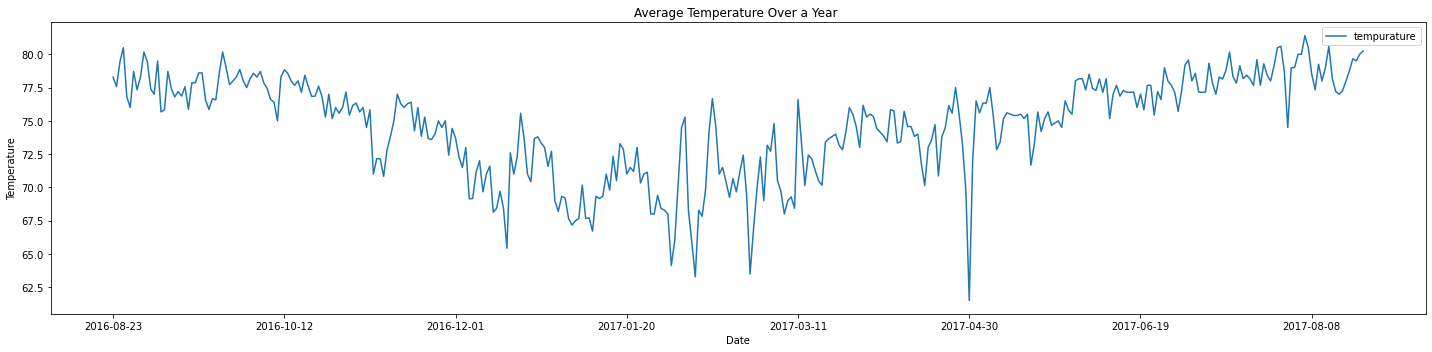

In [281]:


ave_temps_year_df.plot(figsize=(20, 5))
plt.legend()
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title('Average Temperature Over a Year ')

plt.tight_layout()
plt.savefig("images/ave_temp_year.png")

In [282]:
Jan_Feb_year_temps = []
Jan_Feb_year_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)<=2).\
    filter(Measurement.date >= prev_year).all()

In [283]:
Jan_Feb_year_temps_df = pd.DataFrame(Jan_Feb_year_temps, columns=['date', 'tempurature'])

Jan_Feb_year_temps_df

,date,tempurature
0,2017-01-01,62.0
1,2017-01-02,66.0
2,2017-01-03,63.0
3,2017-01-04,62.0
4,2017-01-05,63.0
...,...,...
363,2017-02-24,68.0
364,2017-02-25,66.0
365,2017-02-26,64.0
366,2017-02-27,69.0


In [284]:
Jan_Feb_year_temps_df = Jan_Feb_year_temps_df.groupby(["date"]).mean()['tempurature']
Jan_Feb_year_temps_df

date
2017-01-01    69.333333
2017-01-02    69.200000
2017-01-03    67.666667
2017-01-04    67.166667
2017-01-05    67.500000
2017-01-06    67.666667
2017-01-07    70.166667
2017-01-08    67.666667
2017-01-09    67.714286
2017-01-10    66.714286
2017-01-11    69.333333
2017-01-12    69.166667
2017-01-13    69.333333
2017-01-14    71.000000
2017-01-15    69.800000
2017-01-16    72.333333
2017-01-17    70.500000
2017-01-18    73.285714
2017-01-19    72.857143
2017-01-20    71.000000
2017-01-21    71.500000
2017-01-22    71.200000
2017-01-23    73.000000
2017-01-24    70.333333
2017-01-25    71.000000
2017-01-26    71.142857
2017-01-27    68.000000
2017-01-28    68.000000
2017-01-29    69.400000
2017-01-30    68.428571
2017-01-31    68.285714
2017-02-01    68.000000
2017-02-02    64.142857
2017-02-03    66.000000
2017-02-04    70.200000
2017-02-05    74.500000
2017-02-06    75.285714
2017-02-07    68.285714
2017-02-08    65.857143
2017-02-09    63.285714
2017-02-10    68.285714
2017-02-11 

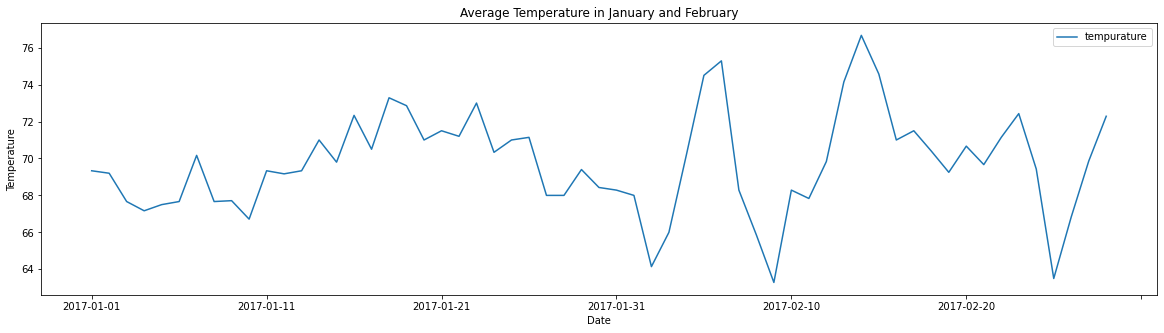

In [285]:
Jan_Feb_year_temps_df.plot(figsize=(20, 5))
plt.legend()
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title('Average Temperature in January and February')
plt.savefig("images/ave_temp_JanFeb.png")


In [286]:
year_perc = []
year_perc =  session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= prev_year).all()

year_perc_df = pd.DataFrame(year_perc, columns=['date', 'precipitation'])
year_perc_df

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [287]:
year_perc_df = year_perc_df.groupby(["date"]).mean()['precipitation']
year_perc_df

date
2016-08-23    0.451667
2016-08-24    1.555000
2016-08-25    0.077143
2016-08-26    0.016667
2016-08-27    0.064000
                ...   
2017-08-19    0.030000
2017-08-20    0.005000
2017-08-21    0.193333
2017-08-22    0.166667
2017-08-23    0.132500
Name: precipitation, Length: 366, dtype: float64

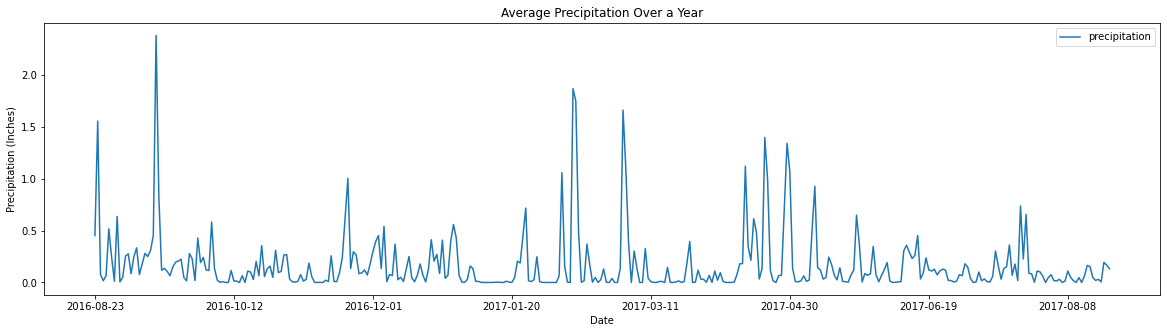

In [288]:
year_perc_df.plot(figsize=(20, 5))
plt.legend()
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.title('Average Precipitation Over a Year')
plt.savefig("images/ave_prec_year")